# 
# CREATING AND TESTING INITIAL MODELS
#

# 
# Importing librarys needed for the project
# =============================================================

In [1]:
# Import data processing libraries.

import pandas as pd
import numpy as np

#Importing Scikit Learn library

#-. Split the data into train and test data sets

from sklearn.model_selection import train_test_split

# -. Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree,svm

#-.XGBoost Model

import xgboost as xgb

#-.Metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

#-.Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# 
# Importing the data into a DataFrame from our previous cleaned data file.
# =============================================================
# 

In [2]:
#Importing the data from CSV files in a dataframe.

df = pd.read_csv ('heart_disease_clean.csv', index_col= 0)
df.head ()

,Heart_Disease,High_BP,High_Chol,Weight,BMI,Smoker,Stroke,Diabetes,Phys_Activ,Eat_Fruits,Eat_Veg,Alcohol,Gen_Health,Ment_Health,Phys_Health,Diff_Walk,Sex,Age
0,0,1,1,280.0,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,0,0,165.0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
3,0,1,1,180.0,28,0,0,0,0,1,0,0,5,30,30,1,0,9
5,0,1,0,145.0,27,0,0,0,1,1,1,0,2,0,0,0,0,11
6,0,1,1,148.0,24,0,0,0,1,1,1,0,2,3,0,0,0,11


In [3]:
df.shape

(290527, 18)

In [4]:
#Checking our date is clean with no missing values
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290527 entries, 0 to 441455
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Heart_Disease  290527 non-null  int64  
 1   High_BP        290527 non-null  int64  
 2   High_Chol      290527 non-null  int64  
 3   Weight         290527 non-null  float64
 4   BMI            290527 non-null  int64  
 5   Smoker         290527 non-null  int64  
 6   Stroke         290527 non-null  int64  
 7   Diabetes       290527 non-null  int64  
 8   Phys_Activ     290527 non-null  int64  
 9   Eat_Fruits     290527 non-null  int64  
 10  Eat_Veg        290527 non-null  int64  
 11  Alcohol        290527 non-null  int64  
 12  Gen_Health     290527 non-null  int64  
 13  Ment_Health    290527 non-null  int64  
 14  Phys_Health    290527 non-null  int64  
 15  Diff_Walk      290527 non-null  int64  
 16  Sex            290527 non-null  int64  
 17  Age            290527 non-nul

# 
# Creating two datsets from the original, one for the terget variable (Y) and other for the dependent variables (X).
#

In [5]:
# Spliting Data into Dependent and Independetn variables, naming Y to dependent or target variable and x to the independent variables.

y = df['Heart_Disease'].copy ()
x = df.drop ('Heart_Disease', axis = 1).copy ()

In [6]:
y.head ()

0    0
1    0
3    0
5    0
6    0
Name: Heart_Disease, dtype: int64

In [7]:
x.head()

,High_BP,High_Chol,Weight,BMI,Smoker,Stroke,Diabetes,Phys_Activ,Eat_Fruits,Eat_Veg,Alcohol,Gen_Health,Ment_Health,Phys_Health,Diff_Walk,Sex,Age
0,1,1,280.0,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,0,165.0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
3,1,1,180.0,28,0,0,0,0,1,0,0,5,30,30,1,0,9
5,1,0,145.0,27,0,0,0,1,1,1,0,2,0,0,0,0,11
6,1,1,148.0,24,0,0,0,1,1,1,0,2,3,0,0,0,11


# 
# ONE-HOT ENCODING. Transforming our categorical variables into dummies.
# =============================================================
# 

In [8]:
#First checking the values of categorial variables (non binary) to make sure there are not any random values.

x['Diabetes'].value_counts ()

0    244454
2     40691
1      5382
Name: Diabetes, dtype: int64

In [9]:
x['Gen_Health'].value_counts ()

2    100729
3     87110
1     51412
4     36846
5     14430
Name: Gen_Health, dtype: int64

In [10]:
x['Age'].value_counts ()

9     37586
10    37412
8     34301
7     28937
11    28271
13    22638
6     21517
12    19765
5     17395
4     14965
3     11975
2      8396
1      7369
Name: Age, dtype: int64

In [11]:
#ENCODING variables into dummies

x_categ = pd.get_dummies (x, columns = ['Diabetes', 'Gen_Health', 'Age'])
x_categ.head()

,High_BP,High_Chol,Weight,BMI,Smoker,Stroke,Phys_Activ,Eat_Fruits,Eat_Veg,Alcohol,...,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13
0,1,1,280.0,40,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,165.0,25,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,180.0,28,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,145.0,27,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
6,1,1,148.0,24,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
y.value_counts (normalize = True) * 100

0    90.41707
1     9.58293
Name: Heart_Disease, dtype: float64

# 
# Spliting Data into Training and Testing Datasets
# =============================================================



In [13]:
#SPLIT DATA into TRAIN and TEST sets

x_train, x_test, y_train, y_test = train_test_split (x_categ, y, random_state = 42, test_size= 0.3,shuffle= True, stratify = y)

# 
# 
# Testing different preliminary calissification algorythms
# =============================================================

## Logistic Regression
# 
# 

In [14]:
#CREATE LOGISTIC REGRESSION MODEL and FIT IT to the training data


logreg  = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

C:\Users\pazen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


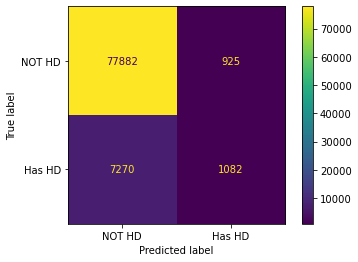

In [15]:
# PLOTING a CONFUSION MATRIX with the test data


plot_confusion_matrix (logreg, x_test, y_test, display_labels = ['NOT HD', 'Has HD'])

In [16]:
#Calculating Accuracy Score and Classification Error of preliminary model


lr_y_pred = logreg.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100
print('Accuracy=',lr_accuracy,'%')
print ('Classification Error', 100 - lr_accuracy,'%')

Accuracy= 90.5976433873725 %
Classification Error 9.4023566126275 %


In [17]:
#Save the confusion matrix and slice it into it's four component's

lr_conf = confusion_matrix (y_test, lr_y_pred)
print (lr_conf)

TP_lr = lr_conf [1,1] #True positive
TN_lr = lr_conf [0,0] #True negative
FP_lr = lr_conf [0,1] #False positive
FN_lr = lr_conf [1,0] #False negative

[[77882   925]
 [ 7270  1082]]


In [18]:
#Calculating the Confusion Matrix Metrics

#Sensitivity
lr_sen = recall_score(y_test,lr_y_pred)*100
print('Sensitivity=', lr_sen,'%')

#Specificity
lr_spe = TN_lr / (TN_lr + FP_lr)*100
print ('Specificity=', lr_spe ,'%')

#Precision
lr_pre = precision_score(y_test,lr_y_pred)*100
print('Precision=', lr_pre ,'%')

Sensitivity= 12.954980842911878 %
Specificity= 98.82624639943153 %
Precision= 53.91131041355257 %


AUC= 84.33924834287674 %


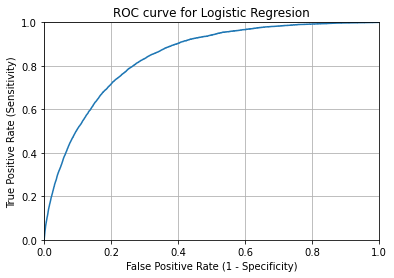

In [20]:
# ROC Curve and Area Under the Curve (AUC)

#Calculating the predicted probabilities
lr_y_pred_prob = logreg.predict_proba(x_test) [:, 1]


#Ploting ROC Curve
fpr, tpr, roc = roc_curve(y_test, lr_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regresion')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#Calculating AUC
lr_AUC = roc_auc_score(y_test, lr_y_pred_prob)*100
print('AUC=', lr_AUC ,'%')

In [21]:
#This function calculates the variaton in Sensitivity and Specificity whe you input different tresholds.

def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[roc > threshold][-1])
    print('Specificity:', 1 - fpr[roc > threshold][-1])

In [22]:
evaluate_threshold(0.2)

Sensitivity: 0.5278975095785441
Specificity: 0.89261106246907


In [23]:
# Using Cross Validation

cross_val_score(logreg, x, y, cv=5, scoring='recall')

array([0.90589612, 0.90618869, 0.90565356, 0.90604939, 0.90594613])

In [24]:
# We get the mean score for our 5 fold StratifiedKFold 
lr_cv = cross_val_score(logreg, x, y, cv=15, scoring='recall').mean () *100
lr_cv

12.33437358797715

# 
## K-Nearest Neighbor
#

In [25]:
#CREATE K-NEAREST NEIGHBOR MODEL and FIT IT to the training data


knn = KNeighborsClassifier(5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

C:\Users\pazen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


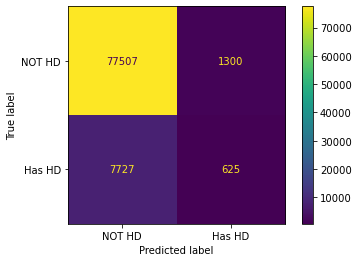

In [26]:
# PLOTING a CONFUSION MATRIX with the test data


plot_confusion_matrix (knn, x_test, y_test, display_labels = ['NOT HD', 'Has HD'])

In [27]:
#Calculating Accuracy Score and Classification Error of preliminary model

knn_y_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test,knn_y_pred) * 100
print("Accuracy=",knn_accuracy,'%')
print("Classification Error=",100-knn_accuracy,'%')

Accuracy= 89.64306612053832 %
Classification Error= 10.356933879461678 %


In [28]:
#Save the confusion matrix and slice it into it's four component's

knn_conf = confusion_matrix (y_test, knn_y_pred)
print (knn_conf)

TP_knn = knn_conf [1,1] #True positive
TN_knn = knn_conf [0,0] #True negative
FP_knn = knn_conf [0,1] #False positive
FN_knn = knn_conf [1,0] #False negative

[[77507  1300]
 [ 7727   625]]


In [29]:
#Calculating the Confusion Matrix Metrics

#Sensitivity
knn_sen = recall_score(y_test,knn_y_pred)*100
print('Sensitivity=', knn_sen,'%')

#Specificity
knn_spe = TN_knn / (TN_knn + FP_knn)*100
print ('Specificity=', knn_spe,'%')

#Precision
knn_pre = precision_score(y_test,knn_y_pred)*100
print('Precision=', knn_pre ,'%')

Sensitivity= 7.483237547892721 %
Specificity= 98.35040034514701 %
Precision= 32.467532467532465 %


AUC= 66.09451169553029 %


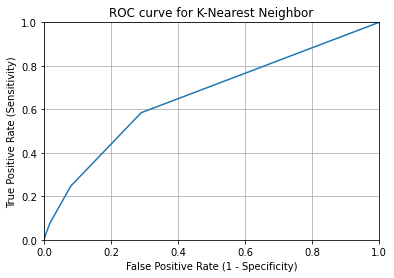

In [31]:
# ROC Curve and Area Under the Curve (AUC)

#Calculating the predicted probabilities
knn_y_pred_prob = knn.predict_proba(x_test) [:, 1]


#Ploting ROC Curve
fpr, tpr, roc = roc_curve(y_test, knn_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for K-Nearest Neighbor')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#Calculating AUC
knn_AUC = roc_auc_score(y_test, knn_y_pred_prob)*100
print('AUC=', knn_AUC,'%')

In [44]:
# Using Cross Validation

cross_val_score(knn, x, y, cv=10, scoring='recall')

array([0.8930231 , 0.89402127, 0.89316078, 0.89501945, 0.89550133,
       0.89443431, 0.89495061, 0.89336362, 0.89425857, 0.89298499])

In [32]:
# We get the mean score for our 5 fold StratifiedKFold 

knn_cv = cross_val_score(knn, x, y, cv=5, scoring='recall').mean () * 100
knn_cv

8.900534413615603

# 
## Random Forest
# 

In [14]:
#CREATE the RANDOM FOREST MODEL and FIT IT to the training data

rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

RandomForestClassifier()

C:\Users\pazen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


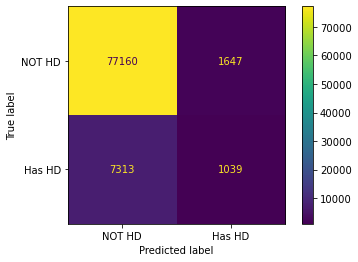

In [16]:
# PLOTING a CONFUSION MATRIX with the test data

plot_confusion_matrix (rand_forest, x_test, y_test, display_labels = ['NOT HD', 'Has HD'])

In [17]:
#Calculating Accuracy of preliminary model

rf_y_pred = rand_forest.predict(x_test)
rf_accuracy =  accuracy_score (y_test,rf_y_pred) * 100
print('Accuracy=',rf_accuracy,'%')
print('Classification Error=',100 - rf_accuracy,'%')

Accuracy= 89.71993712640118 %
Classification Error= 10.280062873598823 %


In [18]:
#Save the confusion matrix and slice it into it's four component's

rf_conf = confusion_matrix (y_test, rf_y_pred)
print (rf_conf)

TP_rf = rf_conf [1,1] #True positive
TN_rf = rf_conf [0,0] #True negative
FP_rf = rf_conf [0,1] #False positive
FN_rf = rf_conf [1,0] #False negative

[[77160  1647]
 [ 7313  1039]]


In [19]:
#Calculating the Confusion Matrix Metrics

#Sensitivity
rf_sen = recall_score(y_test,rf_y_pred)*100
print('Sensitivity=', rf_sen,'%')

#Specificity
rf_spe = TN_rf / (TN_rf + FP_rf)*100
print ('Specificity=', rf_spe ,'%')

#Precision
rf_pre = precision_score(y_test,rf_y_pred)*100
print('Precision=', rf_pre,'%')

Sensitivity= 12.440134099616857 %
Specificity= 97.9100841295824 %
Precision= 38.682055100521225 %


AUC= 80.1082626194495 %


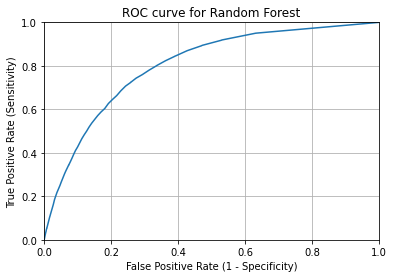

In [38]:
# ROC Curve and Area Under the Curve (AUC)

#Calculating the predicted probabilities
rf_y_pred_prob = rand_forest.predict_proba(x_test) [:, 1]


#Ploting ROC Curve
fpr, tpr, roc = roc_curve(y_test, rf_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#Calculating AUC

rf_AUC = roc_auc_score(y_test, rf_y_pred_prob)*100
print('AUC=', rf_AUC,'%')

In [54]:
# Using Cross Validation

cross_val_score(rand_forest, x, y, cv=5, scoring='accuracy')

array([0.89880563, 0.89842701, 0.89914983, 0.89901215, 0.89921867,
       0.89756652, 0.89873679, 0.89883657, 0.89869888, 0.89739089])

In [39]:
# We get the mean score for our 5 fold StratifiedKFold 

rf_cv = cross_val_score(rand_forest, x, y, cv=5, scoring='recall').mean () *100
rf_cv

12.585729603325472

# 
## XGBOOST
# 

In [40]:
#CREATE XGBOOST MODEL and FIT IT to the training data

xgboost = xgb.XGBClassifier (objective = 'binary:logistic', seed = 42, use_label_encoder=False)
xgboost.fit (x_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'aucpr', 
             eval_set = ([(x_test, y_test)]))

[0]	validation_0-aucpr:0.31653
[1]	validation_0-aucpr:0.32745
[2]	validation_0-aucpr:0.33300
[3]	validation_0-aucpr:0.34011
[4]	validation_0-aucpr:0.34317
[5]	validation_0-aucpr:0.34726
[6]	validation_0-aucpr:0.35199
[7]	validation_0-aucpr:0.35506
[8]	validation_0-aucpr:0.35627
[9]	validation_0-aucpr:0.35784
[10]	validation_0-aucpr:0.35892
[11]	validation_0-aucpr:0.36048
[12]	validation_0-aucpr:0.36159
[13]	validation_0-aucpr:0.36238
[14]	validation_0-aucpr:0.36260
[15]	validation_0-aucpr:0.36339
[16]	validation_0-aucpr:0.36374
[17]	validation_0-aucpr:0.36399
[18]	validation_0-aucpr:0.36456
[19]	validation_0-aucpr:0.36456
[20]	validation_0-aucpr:0.36491
[21]	validation_0-aucpr:0.36517
[22]	validation_0-aucpr:0.36529
[23]	validation_0-aucpr:0.36547
[24]	validation_0-aucpr:0.36544
[25]	validation_0-aucpr:0.36556
[26]	validation_0-aucpr:0.36549
[27]	validation_0-aucpr:0.36537
[28]	validation_0-aucpr:0.36514
[29]	validation_0-aucpr:0.36526
[30]	validation_0-aucpr:0.36524
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\pazen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


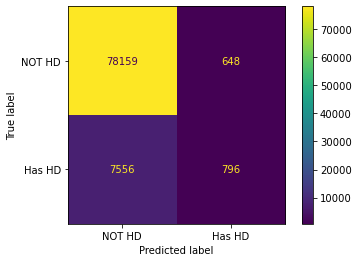

In [41]:
# PLOTING a CONFUSION MATRIX with the test data


plot_confusion_matrix (xgboost, x_test, y_test, display_labels = ['NOT HD', 'Has HD'])

In [42]:
#Calculating Accuracy of preliminary model

xgb_y_pred = xgboost.predict(x_test)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred) * 100
print("accuracy=",xgb_accuracy,'%')

accuracy= 90.58731743136109 %


In [43]:
#Save the confusion matrix and slice it into it's four component's

xgb_conf = confusion_matrix (y_test, xgb_y_pred)
print (xgb_conf)

TP_xgb = xgb_conf [1,1] #True positive
TN_xgb = xgb_conf [0,0] #True negative
FP_xgb = xgb_conf [0,1] #False positive
FN_xgb = xgb_conf [1,0] #False negative

[[78159   648]
 [ 7556   796]]


In [44]:
#Calculating the Confusion Matrix Metrics

#Sensitivity
xgb_sen = recall_score(y_test,xgb_y_pred)*100
print('Sensitivity=', xgb_sen,'%')

#Specificity
xgb_spe = TN_xgb / (TN_xgb + FP_xgb)*100
print ('Specificity=', xgb_spe,'%')

#Precision
xgb_pre = precision_score(y_test, xgb_y_pred)*100
print('Precision=', xgb_pre,'%')

Sensitivity= 9.530651340996169 %
Specificity= 99.17773801819635 %
Precision= 55.124653739612185 %


AUC= 84.40217207072207 %


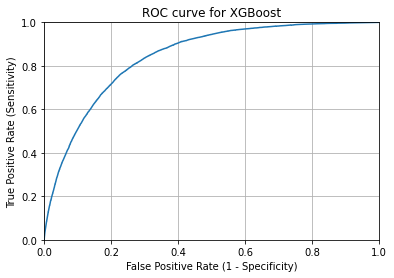

In [45]:
# ROC Curve and Area Under the Curve (AUC)

#Calculating the predicted probabilities
xgb_y_pred_prob = xgboost.predict_proba(x_test) [:, 1]


#Ploting ROC Curve
fpr, tpr, roc = roc_curve(y_test, xgb_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#Calculating AUC

xgb_AUC = roc_auc_score(y_test, xgb_y_pred_prob)*100
print('AUC=', xgb_AUC,'%')

In [62]:
# Using Cross Validation

cross_val_score(xgboost, x, y, cv=5, scoring='recall')

[21:36:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:35] WARNING:

array([0.90527656, 0.90593054, 0.90692872, 0.90641242, 0.90544866,
       0.90372767, 0.90624032, 0.90596172, 0.90616825, 0.90523888])

In [46]:
# We get the mean score for our 5 fold StratifiedKFold 

xgb_cv = cross_val_score(xgboost, x, y, cv=5, scoring='recall').mean () *100
xgb_cv

[18:08:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:15] WARNING:

11.052039409456702

# 
## Decision Tree
# 

In [56]:
#CREATE PRELIMINARY CLASSIFICATION TREE and FIT IT to the training data

classtree = DecisionTreeClassifier (random_state=42)
classtree = classtree.fit (x_train, y_train)

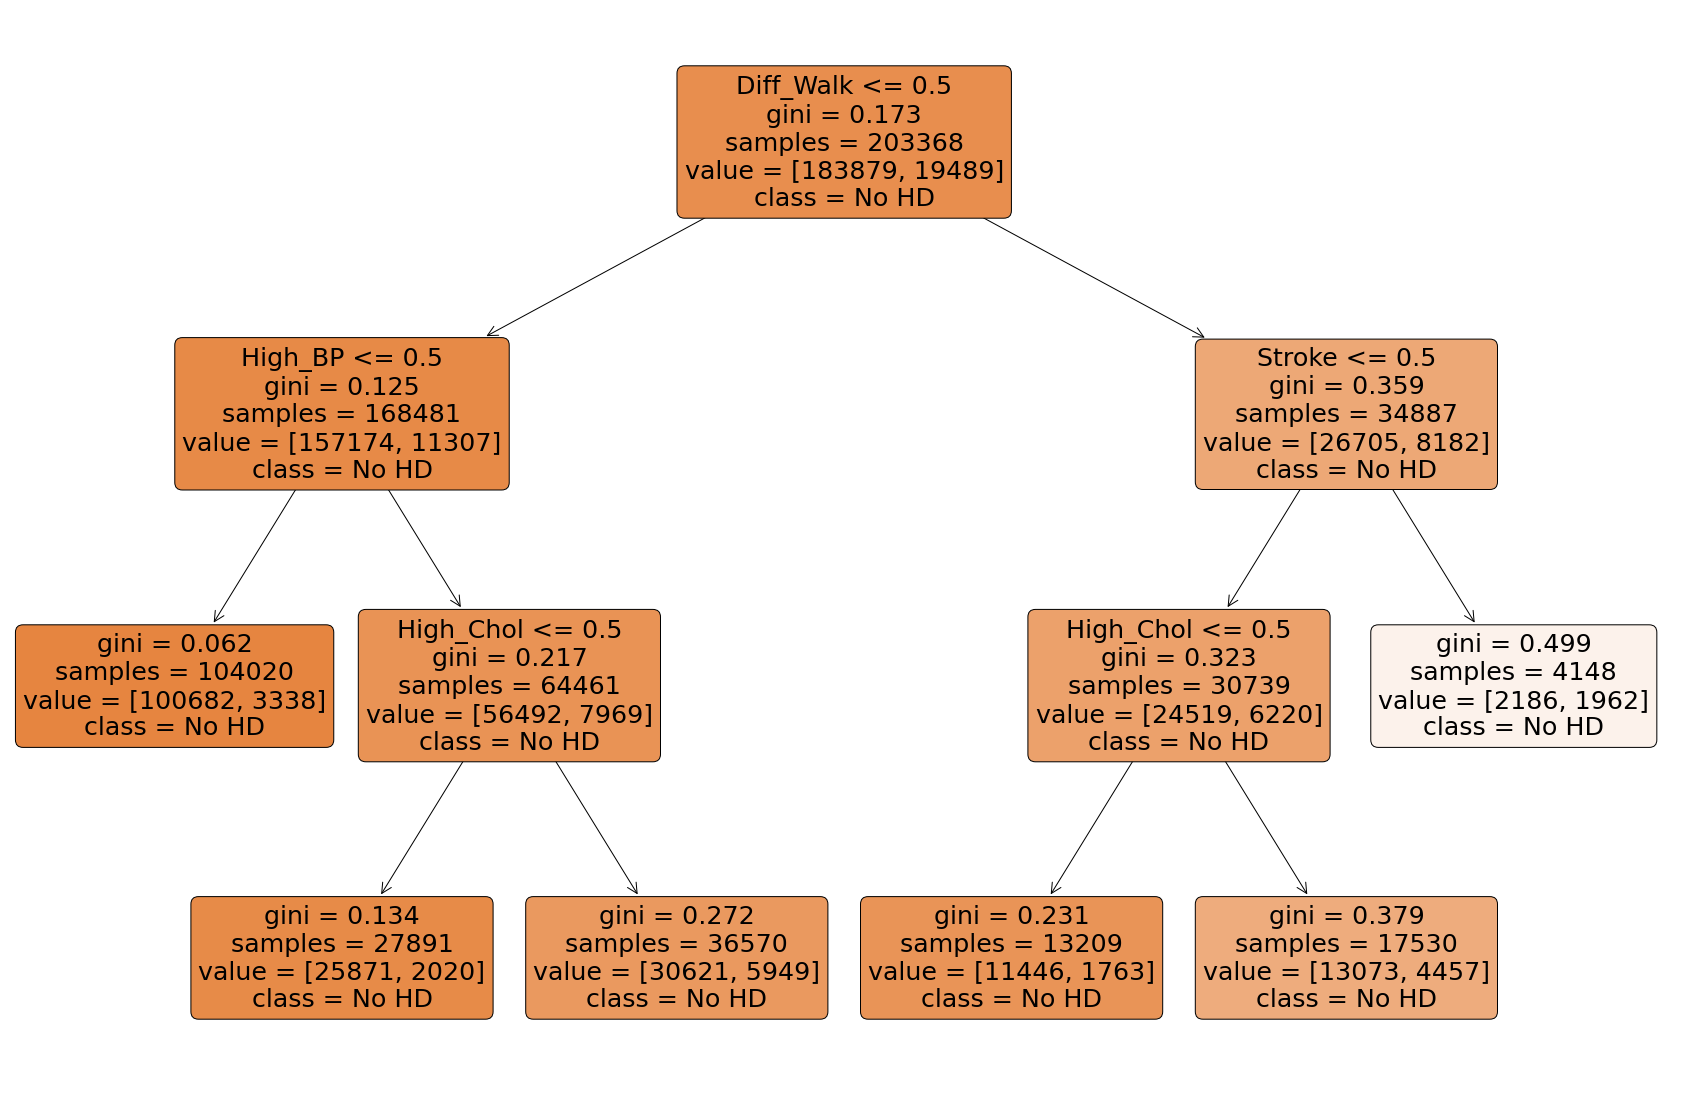

In [48]:
# PLOTING our preliminary tree
plt.figure (figsize = (30,20))
plot_tree (classtree, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names = x_categ.columns)
plt.show()

C:\Users\pazen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


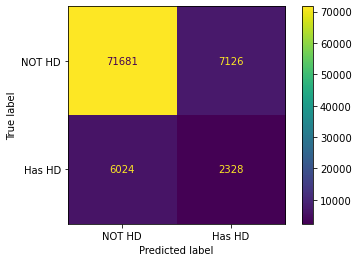

In [57]:
# PLOTING a CONFUSION MATRIX with the test data

plot_confusion_matrix (classtree, x_test, y_test, display_labels = ['NOT HD', 'Has HD'])

In [58]:
#Calculating Accuracy of preliminary model

ct_y_pred = classtree.predict(x_test)
ct_accuracy =  accuracy_score (y_test,ct_y_pred) * 100
print("accuracy=",ct_accuracy,'%')

accuracy= 84.91263093885887 %


In [59]:
#Save the confusion matrix and slice it into it's four component's

ct_conf = confusion_matrix (y_test, ct_y_pred)
print (ct_conf)

TP_ct = ct_conf [1,1] #True positive
TN_ct = ct_conf [0,0] #True negative
FP_ct = ct_conf [0,1] #False positive
FN_ct = ct_conf [1,0] #False negative

[[71681  7126]
 [ 6024  2328]]


In [60]:
#Calculating the Confusion Matrix Metrics

#Sensitivity
ct_sen = recall_score(y_test,ct_y_pred)*100
print('Sensitivity=', ct_sen,'%')

#Specificity
ct_spe = TN_ct / (TN_ct + FP_ct)*100
print ('Specificity=', ct_spe,'%')

#Precision
ct_pre = precision_score(y_test,ct_y_pred)*100
print('Precision=', ct_pre,'%')

Sensitivity= 27.873563218390807 %
Specificity= 90.95765604578273 %
Precision= 24.624497567167335 %


AUC= 59.557836705629406 %


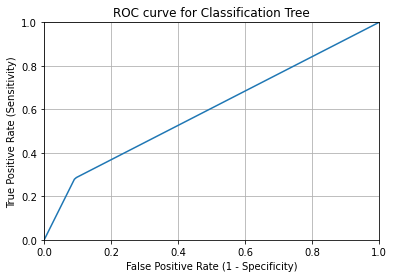

In [61]:
# ROC Curve and Area Under the Curve (AUC)

#Calculating the predicted probabilities
ct_y_pred_prob = classtree.predict_proba(x_test) [:, 1]


#Ploting ROC Curve
fpr, tpr, roc = roc_curve(y_test, ct_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Classification Tree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#Calculating AUC

ct_AUC = roc_auc_score(y_test, ct_y_pred_prob)*100
print('AUC=', ct_AUC,'%')

In [ ]:
# Using Cross Validation

cross_val_score(rand_forest, x, y, cv=5, scoring='recall')

In [62]:
# We get the mean score for our 5 fold StratifiedKFold 

ct_cv = cross_val_score(rand_forest, x, y, cv=5, scoring='recall').mean () *100
ct_cv

12.556993326150714

# 
# Models scores comparision table
# =============================================================
# 

In [64]:
# Building a table with the different scores of the models evaluated,to make it easier to compare

logis = [lr_accuracy, lr_sen, lr_spe, lr_pre, lr_AUC, lr_cv]
knei = [knn_accuracy, knn_sen, knn_spe, knn_pre, knn_AUC, knn_cv]
rando = [rf_accuracy, rf_sen, rf_spe, rf_pre, rf_AUC, rf_cv]
xgbo = [xgb_accuracy, xgb_sen, xgb_spe, xgb_pre, xgb_AUC, xgb_cv]
classif = [ct_accuracy, ct_sen, ct_spe, ct_pre, ct_AUC, ct_cv]
scores = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'AUC', 'Cross_Validation']

data = list(zip(scores, logis, knei, rando, xgbo, classif))
eval_scores = pd.DataFrame(data, columns=['Scores','Logistic Regresion', 'K-Nearest Neighbor', 'Random Forest', 'XGBoost', 
                                          'Classification Tree'])
eval_scores

,Scores,Logistic Regresion,K-Nearest Neighbor,Random Forest,XGBoost,Classification Tree
0,Accuracy,90.597643,89.643066,89.786482,90.587317,84.912631
1,Sensitivity,12.954981,7.483238,12.523946,9.530651,27.873563
2,Specificity,98.826246,98.350400,97.974799,99.177738,90.957656
3,Precision,53.911310,32.467532,39.591219,55.124654,24.624498
4,AUC,84.339248,66.094512,80.108263,84.402172,59.557837
5,Cross_Validation,12.334374,8.900534,12.585730,11.052039,12.556993
